In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
data=pd.read_csv("House_Data.csv")

In [4]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


# we try to remove the variable that the price is not depend

In [5]:
df=data.drop(["availability","area_type","society"],axis="columns")

In [7]:
df

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [8]:
df.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [9]:
df1=df.dropna()

In [10]:
df1.isna().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [11]:
def convert_size(col):
    col=col.split(" ")
    col1=int(col[0])
    return col1

In [12]:
df1["size"]=df1["size"].apply(convert_size)

<ipython-input-12-a589800cac1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["size"]=df1["size"].apply(convert_size)


In [13]:
type(df1["size"][0])

numpy.int64

In [14]:
df1["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
df1.head(400)

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Uttarahalli,3,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Kothanur,2,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
414,Kanakpura Road,3,1550,3.0,3.0,64.50
415,Amco Colony,3,1760,3.0,2.0,88.00
416,Billekahalli,2,1125,2.0,2.0,62.00
417,Nagarbhavi,3,1350,3.0,2.0,150.00


In [16]:
def is_flot(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
df1["total_sqft"][~df1["total_sqft"].apply(is_flot)].unique()

array(['2100 - 2850', '3067 - 8156', '1042 - 1105', '1145 - 1340',
       '1015 - 1540', '34.46Sq. Meter', '1195 - 1440', '1120 - 1145',
       '3090 - 5002', '1160 - 1195', '1000Sq. Meter', '1115 - 1130',
       '520 - 645', '1000 - 1285', '650 - 665', '633 - 666', '5.31Acres',
       '30Acres', '1445 - 1455', '884 - 1116', '850 - 1093',
       '716Sq. Meter', '547.34 - 827.31', '580 - 650', '3425 - 3435',
       '1804 - 2273', '3630 - 3800', '4000 - 5249', '1500Sq. Meter',
       '142.61Sq. Meter', '1574Sq. Yards', '1250 - 1305', '670 - 980',
       '1005.03 - 1252.49', '1004 - 1204', '645 - 936', '2710 - 3360',
       '2830 - 2882', '596 - 804', '1255 - 1863', '1300 - 1405',
       '117Sq. Yards', '934 - 1437', '980 - 1030', '2249.81 - 4112.19',
       '1070 - 1315', '3040Sq. Meter', '500Sq. Yards', '2806 - 3019',
       '613 - 648', '704 - 730', '1210 - 1477', '3369 - 3464',
       '1125 - 1500', '167Sq. Meter', '1076 - 1199', '381 - 535',
       '524 - 894', '540 - 670', '2725 - 3

In [18]:
def convert(c):
    t=c.split("-")
    if len(t)==2:
        return (float(t[0])+float(t[1]))/2
    try:
        return float(c)
    except:
        return None

In [19]:
df2=df1.copy()

In [20]:
df2["total_sqft"]=df2["total_sqft"].apply(convert)

In [21]:
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [22]:
df2

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Kothanur,2,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...
13314,Green Glen Layout,3,1715.0,3.0,3.0,112.00
13315,Whitefield,5,3453.0,4.0,0.0,231.00
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,1.0,60.00
13318,Padmanabhanagar,4,4689.0,4.0,1.0,488.00


In [23]:
df1[~df1["bath"].apply(is_flot)]

,location,size,total_sqft,bath,balcony,price


In [24]:
df1

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Uttarahalli,3,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Kothanur,2,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13314,Green Glen Layout,3,1715,3.0,3.0,112.00
13315,Whitefield,5,3453,4.0,0.0,231.00
13317,Raja Rajeshwari Nagar,2,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4,4689,4.0,1.0,488.00


## feature Enginnering


In [25]:
locationcount=df2.location.value_counts(ascending=False)

In [26]:
to_other=locationcount[locationcount.values<=10]
to_other

HAL 2nd Stage              10
Basapura                   10
Kalkere                    10
Gunjur Palya               10
1st Block Koramangala      10
                           ..
LIC Colony                  1
Puttappa Layout             1
Dhanalakshmi Layout         1
Punappa Layout              1
Banashankari 2 nd Stage     1
Name: location, Length: 1028, dtype: int64

In [27]:
df2.location=df2.location.apply(lambda x: 'other' if x in to_other else x)

In [28]:
df2["price_per_sqft"]=df2["price"].astype('float')/df2["total_sqft"].astype('float')

In [29]:
df2

,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,0.036998
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,0.046154
2,Uttarahalli,3,1440.0,2.0,3.0,62.00,0.043056
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,0.062459
4,Kothanur,2,1200.0,2.0,1.0,51.00,0.042500
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3,1715.0,3.0,3.0,112.00,0.065306
13315,Whitefield,5,3453.0,4.0,0.0,231.00,0.066898
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,1.0,60.00,0.052585
13318,Padmanabhanagar,4,4689.0,4.0,1.0,488.00,0.104073


# Remove Outlier

#### 1. we know that a room can not less than 300 sqft

In [30]:
df3=df2[~(df2.total_sqft/df2["size"]<300)]

In [31]:
df3

,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,0.036998
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,0.046154
2,Uttarahalli,3,1440.0,2.0,3.0,62.00,0.043056
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,0.062459
4,Kothanur,2,1200.0,2.0,1.0,51.00,0.042500
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3,1715.0,3.0,3.0,112.00,0.065306
13315,Whitefield,5,3453.0,4.0,0.0,231.00,0.066898
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,1.0,60.00,0.052585
13318,Padmanabhanagar,4,4689.0,4.0,1.0,488.00,0.104073


## Remmove outlier using stadart diviation 

In [32]:
df_out=pd.DataFrame()
for location,location_df in df3.groupby('location'):
    m=location_df.price_per_sqft.mean()
    d=location_df.price_per_sqft.std()
    out=location_df[(location_df.price_per_sqft>(m-d)) & (location_df.price_per_sqft<=(m+d)) ]
    df_out=pd.concat([df_out,out],ignore_index=True)
df4=df_out
    

In [33]:
df3.price_per_sqft.describe()

count    12013.000000
mean         0.062061
std          0.039855
min          0.002678
25%          0.041994
50%          0.052525
75%          0.068235
max          1.764706
Name: price_per_sqft, dtype: float64

## Plot to see the erorr in the data

In [34]:
import matplotlib
def scatter_plot(location):
    size2=df5[(df.location==location) & (df5["size"]==2)]
    size3=df5[(df.location==location) &( df5["size"]==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(size2.total_sqft,size2.price,color="blue")
    plt.scatter(size3.total_sqft,size3.price,color="green")
scatter_plot('Devarachikkanahalli')

NameError: name 'df5' is not defined

## Remove outlier if the price is less than mean that have size smaller

In [35]:
import numpy as np
def remove_out_si(df):
    re_data=np.array([])
    for location,location_df in df.groupby("location"):
        bhks={}
        for sizes,size_df in location_df.groupby('size'):
            bhks[sizes]={
                'name':sizes,
                'mean':size_df.price_per_sqft.mean(),
                'std':size_df.price_per_sqft.std(),
                'count':size_df.shape[0]
                
            }
        for bhk,bhk_df in location_df.groupby('size'):
            stat=bhks.get(bhk-1)
            if stat and stat['count']>5:
                print(stat)
                re_data=np.append(re_data,bhk_df[bhk_df.price_per_sqft<(stat["mean"])].index.values)
        return df.drop(re_data,axis='index')
df5=remove_out_si(df4)
df5

{'name': 2, 'mean': 0.04278151140436048, 'std': 0.012176591097480574, 'count': 8}


,location,size,total_sqft,bath,balcony,price,price_per_sqft
1,Devarachikkanahalli,2,1250.0,2.0,2.0,40.00,0.032000
2,Devarachikkanahalli,2,1200.0,2.0,2.0,83.00,0.069167
3,Devarachikkanahalli,2,1170.0,2.0,2.0,40.00,0.034188
4,Devarachikkanahalli,3,1425.0,2.0,2.0,65.00,0.045614
5,Devarachikkanahalli,2,947.0,2.0,2.0,43.00,0.045407
...,...,...,...,...,...,...,...
9893,other,2,1256.0,2.0,1.0,65.00,0.051752
9894,other,2,1353.0,2.0,2.0,110.00,0.081301
9895,other,1,812.0,1.0,0.0,26.00,0.032020
9896,other,3,1440.0,2.0,2.0,63.93,0.044396


In [36]:
df4.shape[0]

9898

(array([9.990e+02, 5.480e+03, 2.514e+03, 4.830e+02, 2.590e+02, 9.200e+01,
        4.700e+01, 1.500e+01, 4.000e+00, 3.000e+00]),
 array([0.0125 , 0.03525, 0.058  , 0.08075, 0.1035 , 0.12625, 0.149  ,
        0.17175, 0.1945 , 0.21725, 0.24   ]),
 <a list of 10 Patch objects>)

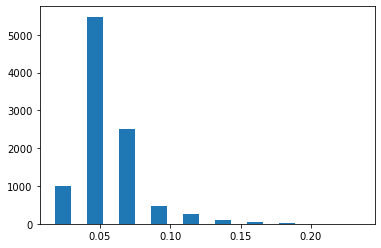

In [37]:
plt.hist(df5.price_per_sqft,rwidth=0.5)

In [38]:
df5[df5.bath>10]

,location,size,total_sqft,bath,balcony,price,price_per_sqft
9318,other,13,5425.0,13.0,0.0,275.0,0.050691


In [39]:
df6=df5[df5.bath<df5["size"]+2]

In [40]:
df6.shape

(9813, 7)

#### drop the columns that we don't use anymore

In [41]:
df7=df6.drop(["price_per_sqft","balcony"],axis="columns")

In [42]:
df7

,location,size,total_sqft,bath,price
1,Devarachikkanahalli,2,1250.0,2.0,40.00
2,Devarachikkanahalli,2,1200.0,2.0,83.00
3,Devarachikkanahalli,2,1170.0,2.0,40.00
4,Devarachikkanahalli,3,1425.0,2.0,65.00
5,Devarachikkanahalli,2,947.0,2.0,43.00
...,...,...,...,...,...
9893,other,2,1256.0,2.0,65.00
9894,other,2,1353.0,2.0,110.00
9895,other,1,812.0,1.0,26.00
9896,other,3,1440.0,2.0,63.93


In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
la=LabelEncoder()
dum=pd.get_dummies(df7.location)

In [45]:
df8=pd.concat([df7,dum],axis="columns")

In [46]:
from sklearn.linear_model import LinearRegression,Lasso
df8

,location,size,total_sqft,bath,price,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,Devarachikkanahalli,2,1250.0,2.0,40.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,2,1200.0,2.0,83.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,2,1170.0,2.0,40.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,3,1425.0,2.0,65.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,2,947.0,2.0,43.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9893,other,2,1256.0,2.0,65.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9894,other,2,1353.0,2.0,110.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9895,other,1,812.0,1.0,26.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9896,other,3,1440.0,2.0,63.93,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [47]:
x=df8.drop(["price","other","location"],axis='columns')

In [48]:
y=df8.price
x

,size,total_sqft,bath,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,2,1250.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1200.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1170.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1425.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,947.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9893,2,1256.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9894,2,1353.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9895,1,812.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9896,3,1440.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
li=LinearRegression()
li.fit(x,y)

LinearRegression()

In [50]:
def predict_price(location,size,total_sqft,bath):
    k=np.where(x.columns==location)[0][0]
    X=np.zeros(len(x.columns))
    X[0]=size
    X[1]=total_sqft
    X[2]=bath
    if k>=0:
        X[k]=1
    return li.predict([X])[0]
predict_price('1st Phase JP Nagar',2, 1000, 2)
    

90.46742198118189

In [51]:
li.score(x,y)

0.8107518388983634

In [52]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

In [53]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv).mean()

0.7802116312109524

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
def select_best(x,y):
    models={
        'linear':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        }
    }
    scores=[]
    for name,con in models.items():
        cl=GridSearchCV(con['model'],con['params'],cv=5)
        cl.fit(x,y)
        scores.append({
            'model':name,
            'score':cl.best_score_,
            'params':cl.best_params_
        })
    return scores
select_best(x,y)

[{'model': 'linear',
  'score': 0.6616632893574874,
  'params': {'normalize': False}}]

In [55]:
import pickle 
with open('models.pickle','wb') as f:
    pickle.dump(li,f,protocol=2)

(9813, 243)

In [61]:
import json 
columns={
    'data_columns':[col.lower() for col in x.columns]
}
with open("col.json","r") as f:
    we=json.load(f)
we


{'data_columns': ['size',
  'total_sqft',
  'bath',
  ' devarachikkanahalli',
  '1st block jayanagar',
  '1st phase jp nagar',
  '2nd phase judicial layout',
  '2nd stage nagarbhavi',
  '5th phase jp nagar',
  '6th phase jp nagar',
  '7th phase jp nagar',
  '8th phase jp nagar',
  '9th phase jp nagar',
  'aecs layout',
  'abbigere',
  'akshaya nagar',
  'ambalipura',
  'ambedkar nagar',
  'amruthahalli',
  'anandapura',
  'ananth nagar',
  'anekal',
  'anjanapura',
  'ardendale',
  'arekere',
  'attibele',
  'beml layout',
  'btm 2nd stage',
  'btm layout',
  'babusapalaya',
  'badavala nagar',
  'balagere',
  'banashankari',
  'banashankari stage ii',
  'banashankari stage iii',
  'banashankari stage v',
  'banashankari stage vi',
  'banaswadi',
  'banjara layout',
  'bannerghatta',
  'bannerghatta road',
  'basavangudi',
  'basaveshwara nagar',
  'battarahalli',
  'begur',
  'begur road',
  'bellandur',
  'benson town',
  'bharathi nagar',
  'bhoganhalli',
  'billekahalli',
  'binny 